# 임의의 입력 생성하기

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional

In [2]:
# RNN, LSTM 테스트를 위해 임의의 입력을 만들기

train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


위 입력의 단어 벡터의 차원은 5, 문장의 길이가 5인 경우를 가정.<br>
timesteps = 4, 단어벡터 차원 = 5

In [3]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


(batch_size, timesteps, input_dim)에 해당하는 (1, 4, 5)의 크기를 가지는 3D 텐서 생성.

# Simple RNN 이해하기

SimpleRNN에는 여러 인자가 있으며 대표적인 인자로 return_sequence와 return_state가 있습니다. 기본값으로는 둘 다 False로 지정되어져 있으므로 별도 지정을 하지 않을 경우에는 False로 처리됩니다. 우선, 은닉 상태의 크기를 3으로 지정하고, 두 인자 값이 모두 Flase일 때의 출력값을 보겠습니다.<br><br>
앞으로의 실습에서 SimpleRNN을 매번 제선언하므로 은닉 상태의 값 자체는 매번 초기화되어 이전 출력과 값의 일관성은 없습니다. 그래서 출력값 자체보다는 해당 값을 크기(shape)에 주목해야 합니다.

In [4]:
rnn = SimpleRNN(3) # rnn = SimpleRNN(3, return_sequence=False, return_state=False)와 동일
hidden_state = rnn(train_X)

print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))

hidden state : [[0.18158567 0.9081141  0.9865812 ]], shape : (1, 3)


(1, 3) 크기의 텐서 = 마지막 시점의 은닉 상태.<br>
기본적으로 return_sequences가 False인 경우에는 SimpleRNN은 마지막 시점의 은직 상태만 출력

In [5]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_state = rnn(train_X)

print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))

hidden state : [[[ 0.9840148   0.99758714 -0.95955235]
  [-0.30148175  0.12238181 -0.88317674]
  [-0.78047717 -0.43305025 -0.6461921 ]
  [ 0.3622281  -0.39729613  0.20206773]]], shape : (1, 4, 3)


(1, 4, 3) 크기의 텐서. 4개의 timesteps 를 모두 출력.<br>
return_state가 True일 경우에는 return_sequences의 True/False 여부와 상관없이 마지막 시점의 은닉 상태를 출력.

In [6]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape : {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))

hidden states : [[[ 0.9813149  -0.9467192  -0.7147814 ]
  [ 0.7977024  -0.6511334   0.8457427 ]
  [ 0.97578007  0.94626814 -0.08178548]
  [-0.657412    0.6014587  -0.5383628 ]]], shape : (1, 4, 3)
last hidden state : [[-0.657412   0.6014587 -0.5383628]], shape : (1, 3)


In [7]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape : {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape : {}'.format(last_state, last_state.shape))

hidden state : [[ 0.61656225 -0.26084462 -0.88746786]], shape : (1, 3)
last hidden state : [[ 0.61656225 -0.26084462 -0.88746786]], shape : (1, 3)


In [8]:
gru = GRU(3, return_sequences=True, return_state=True)
output, state = gru(train_X)

print(output)
print(state)

tf.Tensor(
[[[0.7041106  0.06510243 0.10544618]
  [0.83946997 0.29676792 0.20132706]
  [0.45746383 0.45588997 0.17761189]
  [0.78511524 0.6523046  0.15519252]]], shape=(1, 4, 3), dtype=float32)
tf.Tensor([[0.78511524 0.6523046  0.15519252]], shape=(1, 3), dtype=float32)


# LSTM 이해하기

실제로 SimpleRNN은 거의 사용되지 않는다.<br>
LSTM, GRU를 주로 사용한다.

In [9]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state: {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state: {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state: {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state: [[ 0.12364543 -0.06519949 -0.16595928]], shape: (1, 3)
last hidden state: [[ 0.12364543 -0.06519949 -0.16595928]], shape: (1, 3)
last cell state: [[ 0.14055488 -0.895953   -0.40111345]], shape: (1, 3)


SimpleRNN 과 달리, 세 개의 결과를 반환한다. return_sequences가 False이므로 우선 첫번째 결과는 마지막 시점의 은닉 상태이다. 그런데 LSTM은 return_state를 True로 하면 마지막 시점의 은닉 상태 뿐만 아니라 셀 상태까지 반환한다.

In [10]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states: {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state: {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state: {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states: [[[-0.5268187  -0.2332932  -0.09940537]
  [-0.59234345 -0.3127635  -0.12894979]
  [-0.62083614 -0.21754953 -0.16985902]
  [-0.7021638  -0.29931545 -0.23508278]]], shape: (1, 4, 3)
last hidden state: [[-0.7021638  -0.29931545 -0.23508278]], shape: (1, 3)
last cell state: [[-1.2463481 -0.6384162 -0.5430225]], shape: (1, 3)


return_state가 True이므로 두번째 출력값이 마지막 은닉 상태, 세번째 출력값이 마지막 셀 상태인 것은 변함없다.

# BiLSTM 이해하기

return_sequences의 값에 따라 은닉 상태의 값이 어떻게 바뀌는지 비교

In [11]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [13]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print("hidden states: {}, shape: {}".format(hidden_states, hidden_states.shape))
print("forward state: {}, shape: {}".format(forward_h, forward_h.shape))
print("backward state: {}, shape: {}".format(backward_h, backward_h.shape))

hidden states: [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state: [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state: [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


return_state가 True인 경우 정방향 LSTM의 은닉 상태와 셀 상태, 역방향 LSTM의 은닉 상태와 셀 상태 4가지를 반환. 셀 상태는 각각 forward_c와 backward_c에 저장만 하고 출력하지 않는다.<br>
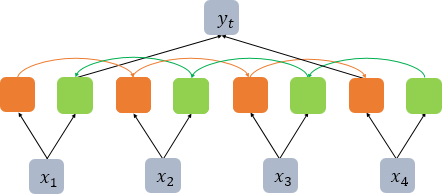

정방향 LSTM의 마지막 시점의 은닉 상태값과 역방향 LSTM의 첫번째 은닉 상태값을 기억해둡시다.

- 정방향 LSTM의 마지막 시점의 은닉 상태값 : [0.6303139 0.6303139 0.6303139]
- 역방향 LSTM의 첫번째 시점의 은닉 상태값 : [0.70387346 0.70387346 0.70387346]

현재 은닉 상태의 값을 고정시켜두었기 때문에 return_sequences를 True로 할 경우, 출력이 어떻게 바뀌는지 비교가 가능합니다.

In [15]:
ilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [16]:
print("hidden states: {}, shape: {}".format(hidden_states, hidden_states.shape))
print("forward state: {}, shape: {}".format(forward_h, forward_h.shape))
print("backward state: {}, shape: {}".format(backward_h, backward_h.shape))

hidden states: [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state: [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state: [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


hidden states의 출력값에서는 이제 모든 시점의 은닉 상태가 출력됨.<br>
역방향 LSTM의 첫번째 시점의 은닉 상태는 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는 것이 아니라 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결된다.<br>
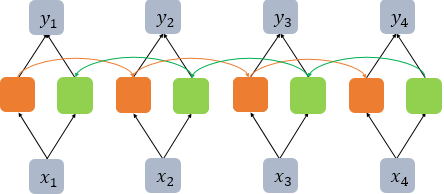